# Bem vindos à segunda aula do PANDA!!

Você pode pegar todos os códigos e slides dessa aula no Github: https://github.com/vccolombo/PANDA-aula2 <br />
Você pode entrar em contato comigo por email: victorcora98@gmail.com <br />
Ou diretamente pelo Telegram: @vccolombo

É ideal que sua primeira célula do notebook seja sempre seus imports! <br />
Evite dar imports no meio do código, prefira voltar na primeira célula e adicionar o novo import aqui. **Não esqueça de rodar novamente** <br /> <br />
Dicas: 
- Você pode rodar a célula atual pressionando **Ctrl + enter**
- Você pode rodar a célula atual **e ir para a próxima célula** apertando **Shift + enter**
- Você pode rodar novamente todo o seu código apertando **Ctrl + F9**
- Você pode ativar a correção automática de bugs apertando **F13**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import graphviz
from IPython.display import display, Image
import pydotplus

# Como ler arquivos no Pandas?

No Google Colab:
https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92

In [0]:
url = "https://raw.githubusercontent.com/vccolombo/PANDA-aula2/master/data/train.csv"
df_raw = pd.read_csv(url)

# Primeiro de tudo

O primeiro passo sempre deve ser ter uma visão básica dos seus dados!

1. Visão geral dos seus dados: quantas colunas, o que elas contêm, tipos de dados
2. Dados faltando ou inconsistentes: NaN e outliers
3. Seu objetivo: o que você está tentando prever?

Pela primeira vez veremos dados não numéricos, então prepare-se.

In [3]:
df_raw.head() # Mostra os primeiros elementos do DF

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_raw.tail(10) # Você pode aumentar o número de elementos retornados passando a quantidade como parâmetro

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [5]:
df_raw.sample(7) # Você pode pegar uma amostra dos seus dados em uma distribuição uniforme

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
330,331,1,3,"McCoy, Miss. Agnes",female,NaN,2,0,367226,23.2500,NaN,Q
93,94,0,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,C.A. 2315,20.5750,NaN,S
425,426,0,3,"Wiseman, Mr. Phillippe",male,NaN,0,0,A/4. 34244,7.2500,NaN,S
426,427,1,2,"Clarke, Mrs. Charles V (Ada Maria Winfield)",female,28.0,1,0,2003,26.0000,NaN,S
156,157,1,3,"Gilnagh, Miss. Katherine ""Katie""",female,16.0,0,0,35851,7.7333,NaN,Q
657,658,0,3,"Bourke, Mrs. John (Catherine)",female,32.0,1,1,364849,15.5000,NaN,Q
730,731,1,1,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S


In [6]:
df_raw.info() # informações básicas sobre cada coluna
# primeira coluna: nome da coluna
# segunda coluna: número de dados não nulos
# terceira coluna non-null
# quarta coluna: tipo dos dados: int (inteiro), object (string) ou float (real)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# o método describe() mostra diversas informações sobre todas as colunas numéricas do seu dataframe
df_raw.describe()

# veja que colunas não numéricas (object) não aparecem

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Como acessar linhas específicas

Na última aula vimos como acessar dados no Numpy. No Pandas será um pouco diferente. Raramente queremos pegar uma linha específica, e sim conjuntos de linhas que seguem alguma lógica. Veremos isso logo mais.

Primeiramente: Não podemos acessar mais uma linha com df[0] por exemplo. Agora precisamos usar o .iloc[0]

In [0]:
# df_raw[0] # erro

In [9]:
df_raw.iloc[0] # primeira linha

PassengerId                          1
Survived                             0
Pclass                               3
Name           Braund, Mr. Owen Harris
Sex                               male
Age                                 22
SibSp                                1
Parch                                0
Ticket                       A/5 21171
Fare                              7.25
Cabin                              NaN
Embarked                             S
Name: 0, dtype: object

# E colunas específicas?

In [10]:
df_raw.iloc[:, 0] # Primeira coluna: PassengerId

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [11]:
df_raw["PassengerId"]

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

In [12]:
df_raw.PassengerId

0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64

# E se a coluna tiver espaços?

Vamos mostrar primeiro como inserir uma nova coluna

In [13]:
# Primeiro vamos usar um novo DF para não mexermos no DF original
df_raw_add_coluna = df_raw

# agora adicionamos uma nova coluna. Vamos usar o PassengerId multiplicado por 2, por simplicidade
df_raw_add_coluna["nova coluna inutil"] = df_raw_add_coluna["PassengerId"] * 2 # veja como é simples no pandas multiplicar a coluna inteira por um valor

# Você também pode somar duas colunas
df_raw_add_coluna["coluna soma"] = df_raw_add_coluna["SibSp"] + df_raw_add_coluna["Parch"]

# Veja que usar a notação df.coluna não funciona na hora de criar novas colunas
df_raw_add_coluna.algumacoluna = df_raw_add_coluna.Sex

df_raw_add_coluna.sample(5)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  # Remove the CWD from sys.path while we load stuff.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,nova coluna inutil,coluna soma
782,783,0,1,"Long, Mr. Milton Clyde",male,29.0,0,0,113501,30.0000,D6,S,1566,0
853,854,1,1,"Lines, Miss. Mary Conover",female,16.0,0,1,PC 17592,39.4000,D28,S,1708,1
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,238,1
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,234,0
257,258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.5000,B77,S,516,0


In [14]:
# agora vamos tentar recuperar a nova coluna
# df_raw_add_coluna.nova coluna inutil # erro, pois não pode haver espaços!!

# Devido ao uso de espaços, podemos usar apenas a notação []
df_raw_add_coluna["nova coluna inutil"]

# Portanto prefira usar camelCase ou under_scored quando criar seus nomes de colunas
# under_scored é a convenção do Python para nomear variáveis

0         2
1         4
2         6
3         8
4        10
       ... 
886    1774
887    1776
888    1778
889    1780
890    1782
Name: nova coluna inutil, Length: 891, dtype: int64

# Vamos finalmente voltar ao nosso DF antigo então

In [15]:
df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,nova coluna inutil,coluna soma
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,4,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,6,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,8,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,10,0


Opa!!! Por que nosso df_raw está com as colunas novas??? Eu mexi apenas na cópia!

Na verdade, quando fazemos `df_novo = df_antigo` no Pandas estamos passando uma referência para o df_antigo, e não uma cópia. Isso se deve ao fato de que cópias do seu DF podem consumir muita memória e travar seu PC quando estiver mexendo com dados reais.

Isso também acontece com listas em Python, veja o que acontece se você rodar o seguinte código Python:

```
lista1 = [1, 2, 3]
lista2 = lista1
lista2.append(4)
print(lista1, lista2)

# [1, 2, 3, 4] [1, 2, 3, 4]
```

Para solucionarmos esse problema, o Pandas oferece uma função para copiar seu DF para outra variável.


In [16]:
# Vamos pegar nosso DF original primeiramente
url = "https://raw.githubusercontent.com/vccolombo/PANDA-aula2/master/data/train.csv"
df_raw = pd.read_csv(url)

# E fazer uma cópia 
df_raw_copy = df_raw.copy()

df_raw_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
# Vamos agora modificar nossa cópia e ver o que acontece com o DF antigo
df_raw_copy["nova_coluna"] = "sou lindo" # você pode criar uma coluna de valor único também

df_raw_copy.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,nova_coluna
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,sou lindo
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,sou lindo
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,sou lindo
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,sou lindo
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,sou lindo


In [18]:
# E o que aconteceu com o DF antigo?
df_raw.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Vamos voltar aos nossos dados

## Quais dados estão incompletos? 

Vimos anteriormente que temos algumas colunas com dados incompletos, vamos relembrar quais são:

In [19]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Vários algoritmos que veremos não aceitam dados faltantes (pense no caso do KNN, qual a distância entre um valor nulo e um ponto no espaço?). Temos as colunas Age, Cabin e Embarked com dados faltantes. Quando isso acontece, temos algumas opções:

A mais trivial é simplesmente descartar a coluna. Porém isso raramente é usado, pois há uma perda muito grande de informações que podem ser muito importantes para o seu modelo. 

Outra ideia é substituir os dados faltantes com dados que façam sentido. Normalmente usamos a média para dados numéricos, e a moda para dados categóricos. Trabalhos mais avançados podem fazer uma análise profunda dos dados antes de substituir esses dados.

Vamos pensar no que fazer com a coluna Cabin primeiramente. Apesar de ser uma coluna com dados interessantes, pois algumas cabines eram mais próximas de botes salva-vidas e essas pessoas tiveram maior taxa de sobrevivência, esse é um caso que não vale a pena tentar completar os dados. Muitos dados estão faltando! Vamos simplesmente apagar a coluna inteira

In [20]:
df = df_raw.drop(["Cabin"], axis=1) # axis = 1 significa dropar uma coluna, axis = 0 uma linha

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
# vamos aproveitar para mostrar como apagar uma coluna sem criar uma cópia e gastar memória extra usando o inplace:

df.drop(["PassengerId"], axis=1, inplace=True)

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


No caso do Embarked, temos apenas 2 dados faltantes. Por ser uma feature categórica, vamos usar a moda para escolher o que colocar nos dados faltantes:

In [22]:
# value_counts() mostra a quantidade de cada valor único em uma coluna. Use em variáveis categóricas que tem poucos valores únicos:
df['Embarked'].value_counts() 

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [23]:
# 'S' é o valor mais comum, então vamos ver como substituir os valores faltantes por 'S'
df['Embarked'] = df['Embarked'].fillna('S')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


Por fim, precisamos olhar a idade. Poderiamos simplesmente pegar a média de todas as idades. Mas vamos aproveitar para aprender algumas maneiras melhores de completar nossos dados.

Normalmente, a média é uma generalização muito básica dos nossos dados. É comum que haja muitas variáveis que influenciem no comportamento dos dados. No caso do Titanic, sabemos que a classe que o passageiro está tem influência em sua idade.

Nem sempre temos essas informações previamente. O Titanic é um caso famoso, mas pode não ser o caso em dados reais. Dessa forma você precisa analisar seus dados mais profundamente: plotar dezenas de gráficos é algo normal no mundo da ciência de dados. 


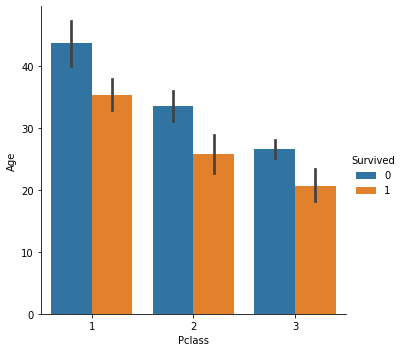

In [24]:
g = sns.catplot("Pclass", "Age", "Survived", data=df, kind="bar")
plt.show()

In [25]:
# Primeiro precisamos separar nossos dados em nulos e não nulos
df_age_null = df[df['Age'].isnull() == True]
df_age_not_null = df[df['Age'].isnull() == False]

df_age_null.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,Q
17,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
19,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,C
26,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,C
28,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,Q


In [26]:
# vamos agora achar as médias de idade em relação a classe e ao sexo do passageiro
df_age_not_null_grouped = df_age_not_null.groupby(['Pclass', 'Sex'])
age_mean = df_age_not_null_grouped['Age'].mean().to_dict()
age_mean

{(1, 'female'): 34.61176470588235,
 (1, 'male'): 41.28138613861386,
 (2, 'female'): 28.722972972972972,
 (2, 'male'): 30.74070707070707,
 (3, 'female'): 21.75,
 (3, 'male'): 26.507588932806325}

In [27]:
# Tome um tempo para tentar entender o que está acontecendo aqui
df_age_null.loc[::, 'Age'] = df_age_null.apply(lambda x: age_mean[(x['Pclass'], x['Sex'])], axis=1)
df_age_null.tail(10)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
832,0,3,"Saad, Mr. Amin",male,26.507589,0,0,2671,7.2292,C
837,0,3,"Sirota, Mr. Maurice",male,26.507589,0,0,392092,8.0500,S
839,1,1,"Marechal, Mr. Pierre",male,41.281386,0,0,11774,29.7000,C
846,0,3,"Sage, Mr. Douglas Bullen",male,26.507589,8,2,CA. 2343,69.5500,S
849,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,34.611765,1,0,17453,89.1042,C
859,0,3,"Razi, Mr. Raihed",male,26.507589,0,0,2629,7.2292,C
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,21.750000,8,2,CA. 2343,69.5500,S
868,0,3,"van Melkebeke, Mr. Philemon",male,26.507589,0,0,345777,9.5000,S
878,0,3,"Laleff, Mr. Kristo",male,26.507589,0,0,349217,7.8958,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.750000,1,2,W./C. 6607,23.4500,S


In [28]:
# concatenamos os valores substituidos com os valores antigos
df = pd.concat([df_age_null, df_age_not_null])
df.info()
# temos agora todos os dados completos

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 5 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 76.6+ KB


Precisamos agora transformar todos os nossos dados categóricos para dados numéricos, pois o algoritmo de ML que iremos usar não aceita Strings. 

Vamos começar retirando duas variáveis que nossa intuição sugere que não agregam muito ao que estamos tentando prever: nome do passageiro e número do ticket de embarque. 

Spoiler: a feature Name na verdade esconde uma informação importante, você consegue descobrir qual? (mesmo assim vamos desconsiderar ela por questão de simplicidade)

In [29]:
df.drop(['Name', 'Ticket'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,male,26.507589,0,0,8.4583,Q
17,1,2,male,30.740707,0,0,13.0000,S
19,1,3,female,21.750000,0,0,7.2250,C
26,0,3,male,26.507589,0,0,7.2250,C
28,1,3,female,21.750000,0,0,7.8792,Q


Contudo, não podemos nos desfazer das features Sex e Embarked. Se você já assistiu o filme Titanic, você com certeza deve saber que 'mulheres e crianças primeiro'. Dessa forma, imaginamos que mulheres têm maior chance de sobreviver ao acidente 

## Desafio 
Prove isso por meio de um gráfico

In [30]:
# Vamos usar o método apply para substituir Sex por um valor binário 0 (mulher) ou 1 (homem)
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,1,26.507589,0,0,8.4583,Q
17,1,2,1,30.740707,0,0,13.0000,S
19,1,3,0,21.750000,0,0,7.2250,C
26,0,3,1,26.507589,0,0,7.2250,C
28,1,3,0,21.750000,0,0,7.8792,Q


In [31]:
# Aqui, vamos usar uma função presente no Sklearn para nos ajudar a substituir valores categóricos por numéricos
le = LabelEncoder()
df['Embarked'] = le.fit_transform(df['Embarked'])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
5,0,3,1,26.507589,0,0,8.4583,1
17,1,2,1,30.740707,0,0,13.0000,2
19,1,3,0,21.750000,0,0,7.2250,0
26,0,3,1,26.507589,0,0,7.2250,0
28,1,3,0,21.750000,0,0,7.8792,1


# Finalmente: Árvores de decisão

Você pode já ter ouvido que IA é nada mais que um monte de if-else. Isso é especialmente verdade para árvores de decisão! 

### Vantagens

- Fácil de entender: Muitos algoritmos de Machine Learning são complexos de entender. Árvores de decisão são simples, facilmente interpretáveis e de fácil visualização (vamos mostrar como visualizar a árvore resultante)
- Não precisa de tanta manipulação e limpeza dos dados: O algoritmo não é tão influenciavel por outliers. Além disso, não é necessário normalizar os dados.
- Aceita ambos dados numéricos ou categóricos.

 
### Desvantagens

- Over fitting: Over fitting is one of the most practical difficulty for decision tree models. This problem gets solved by setting constraints on model parameters and pruning (discussed in detailed below).
- Not fit for continuous variables: While working with continuous numerical variables, decision tree looses information when it categorizes variables in different categories.


### Sabendo mais sobre o algoritmo:

- Básico de árvores de decisão: https://medium.com/@chiragsehra42/decision-trees-explained-easily-28f23241248
- Termos, explicações e vantagens/desvantagens: https://clearpredictions.com/Home/DecisionTree
- Como a divisão é feita: https://towardsdatascience.com/entropy-how-decision-trees-make-decisions-2946b9c18c8

In [32]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']

print(X.head(), y)

    Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
5        3    1  26.507589      0      0   8.4583         1
17       2    1  30.740707      0      0  13.0000         2
19       3    0  21.750000      0      0   7.2250         0
26       3    1  26.507589      0      0   7.2250         0
28       3    0  21.750000      0      0   7.8792         1 5      0
17     1
19     1
26     0
28     1
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [35]:
y_predict = tree.predict(X_test)
accuracy_score(y_test, y_predict)

0.770949720670391

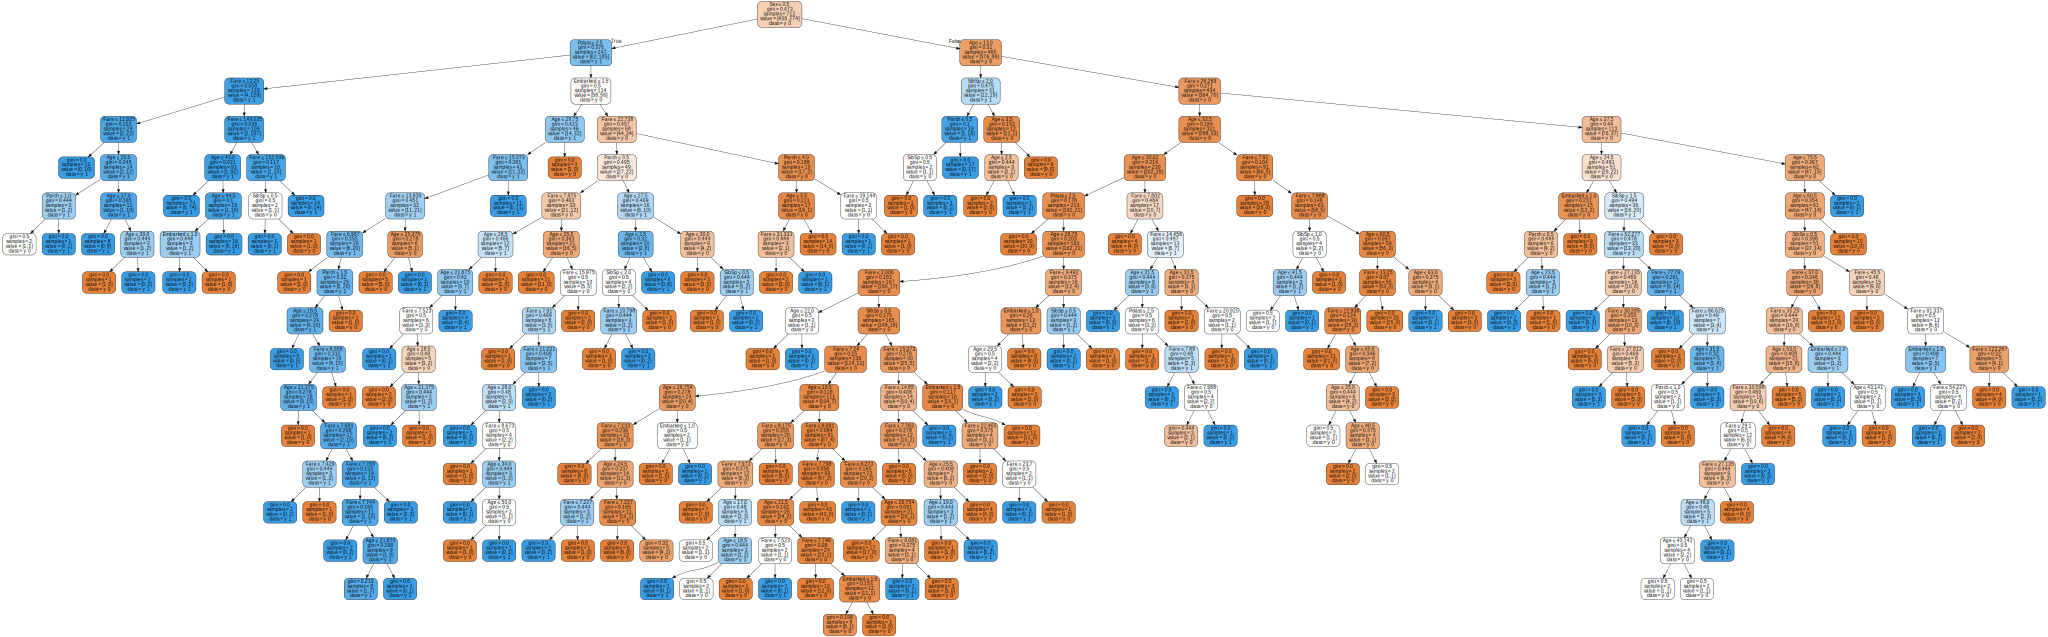

In [36]:
# Visite https://medium.com/@rnbrown/creating-and-visualizing-decision-trees-with-python-f8e8fa394176 para saber mais sobre como plotar essa árvore
display(graphviz.Source(export_graphviz(
    tree, 
    feature_names=X_train.columns,
    class_names=True,
    filled=True, 
    rounded=True,
    special_characters=True)))

# Desafio

Compare o resultado da árvore de decisão com o KNN não normalizado. Aproveite e normalize o conjunto de dados, e depois rode o KNN novamente.

# Esse resultado faz sentido? Ele é bom?

Quando estamos mexendo com classes binárias, qualquer resultado abaixo de 50% é horrível. Pense que você precise prever se uma moeda jogada vai cair em cara ou coroa. Se você sempre chutar que vai cair coroa, após suficientes lançamentos você vai acertar em média 50%

No caso do Titanic, porém, há alguns truques. As classes não estão distribuídas uniformemente. A maioria das pessoas morreu no acidente, o que significa que se chutarmos que todas as pessoas morreram, teremos uma taxa de acerto maior que 50%!! Vamos ver quanto seria essa taxa:

In [37]:
# y é o nosso target. y.value_counts()[0] é o número de mortos e [1] o de sobreviventes
y.value_counts()[0] / (y.value_counts()[0] + y.value_counts()[1])

0.6161616161616161

Isso mostra que se simplesmente prevermos que todos morreram, vamos acertar 61.6% das vezes. Por isso, qualquer resultado pior que 62% no nosso modelo é um péssimo modelo.

Outro truque é dizer que se o sexo da pessoa é mulher, ela sobreviveu. Caso contrário, ela morreu. Vamos ver qual taxa de acerto isso nos dá

In [0]:
mulheres = df[df.Sex == 0]
homens = df[df.Sex == 1]

In [39]:
print("Mulheres: \n", mulheres.Survived.value_counts())
print("Homens: \n", homens.Survived.value_counts())

Mulheres: 
 1    233
0     81
Name: Survived, dtype: int64
Homens: 
 0    468
1    109
Name: Survived, dtype: int64


In [40]:
print("Mulheres: ", mulheres.Survived.value_counts()[1] / (mulheres.Survived.value_counts()[0] + mulheres.Survived.value_counts()[1]))
print("Homens: ", homens.Survived.value_counts()[0] / (homens.Survived.value_counts()[1] + homens.Survived.value_counts()[0]))

Mulheres:  0.7420382165605095
Homens:  0.8110918544194108


In [41]:
resultado = df.apply(lambda x: 0 if x.Sex == 1 else 1, axis=1)
accuracy_score(df['Survived'], resultado)

0.7867564534231201

Isso significa que com uma simples verificação do sexo do passageiro, conseguimos prever com 78.6% de acurácia se ele sobreviveria ou não. Portanto, qualquer modelo que seja pior que isso não serve (lembre-se que estamos roubando um pouco aqui, pois estamos testando conjuntos diferentes da árvore de decisão que treinamos agora pouco)

# Desafio

Repita o processo que acabamos de fazer, mas usando o X_test e y_test para comparar com a árvore de decisão que treinamos com o Sklearn

# Como melhorar ainda mais?

A primeira abordagem para melhorar nossa árvore é mexer nos parâmetros do nosso modelo. Olhe a documentação do [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

Veja quantas opções temos! Por onde sequer começar???

Para nossa alegria, o Sklearn tem ferramentas para testarmos diversas configurações diferentes e escolhermos a melhor possível. Vamos ver como fazer:

In [42]:
# Cuidado isso pode demorar muito para rodar. Espere uns minutos para completar ou mude os valores dos parâmetros

# Primeiro vamos escolher quais parâmetros testar
parameters = {'max_depth': np.arange(1, 20, 1), 
              'min_samples_split': np.arange(2, 20, 1), 
              'min_samples_leaf': np.arange(1, 5, 1)}

# Agora a mágica do GridSearch
tree = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
clf = GridSearchCV(tree, parameters, cv=10,scoring='balanced_accuracy')
clf.fit(X_train, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
       

In [43]:
print(clf.best_score_,clf.best_params_)
print("Accuracy:",accuracy_score(y_test, clf.predict(X_test)))

0.7877145378247742 {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 5}
Accuracy: 0.7877094972067039
